In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('~/recommender_system/books_recommender/preprocessed_metadata/learner_books_info_close_events.csv')

/home/rraju/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (11,13,16,19,21,25,31,35,39,48,49,52,56,64,65,66,67,74,80,82) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.shape

(614897, 89)

In [4]:
valid_ages_df = df[(df['age'] >= 5.0) & (df['age'] <= 20.0)]

In [5]:
valid_ages_df.shape

(596780, 89)

In [6]:
learners = valid_ages_df['learner_id'].unique()
books = valid_ages_df['book_code'].unique()
no_of_learners = len(learners)
no_of_books = len(books)

In [7]:
no_of_learners, no_of_books

(82075, 9061)

In [8]:
user_items_df = valid_ages_df.groupby(['learner_id']).agg({'book_code': 'count'})
user_items_df.rename(columns={'book_code' : 'no_of_books'}, inplace=True)
user_items_df.head()

,no_of_books
learner_id,
5.0,2
31.0,1
61.0,12
181.0,18
456.0,1


In [41]:
no_of_books_dist = user_items_df['no_of_books'].value_counts()
no_of_books_dist

1      21884
2      13340
3       8770
4       6427
5       4675
6       3733
7       2818
8       2427
9       1883
10      1661
11      1333
12      1204
13       943
14       912
15       766
16       748
17       590
18       587
19       507
20       477
22       400
21       380
24       325
23       322
26       289
25       265
28       242
27       202
30       198
32       190
       ...  
162        2
145        2
171        1
161        1
133        1
322        1
256        1
166        1
188        1
219        1
155        1
176        1
154        1
261        1
247        1
240        1
153        1
151        1
198        1
187        1
178        1
149        1
147        1
230        1
146        1
182        1
137        1
144        1
119        1
210        1
Name: no_of_books, Length: 171, dtype: int64

In [44]:
min_20_max_100_books = no_of_books_dist[(no_of_books_dist.index>=20) & (no_of_books_dist.index<=100)]
min_20_max_100_books

20     477
22     400
21     380
24     325
23     322
26     289
25     265
28     242
27     202
30     198
32     190
33     179
31     178
29     178
34     154
40     132
36     131
38     124
35     121
37     119
39     106
41      97
42      88
44      85
46      82
48      77
43      77
50      74
45      73
49      69
      ... 
72      25
70      25
69      24
80      23
71      22
73      22
77      20
98      19
96      18
87      16
75      16
82      14
84      14
81      13
83      12
85      12
93      12
76      12
79      10
86      10
89      10
91      10
92       9
94       8
95       8
90       8
99       8
100      7
88       7
97       2
Name: no_of_books, Length: 81, dtype: int64

In [43]:
user_items_df[user_items_df['no_of_books'] == 100]

,no_of_books
learner_id,
31752.0,100
58612.0,100
90557.0,100
100569.0,100
397203.0,100
493450.0,100
574364.0,100


<IPython.core.display.Javascript object>


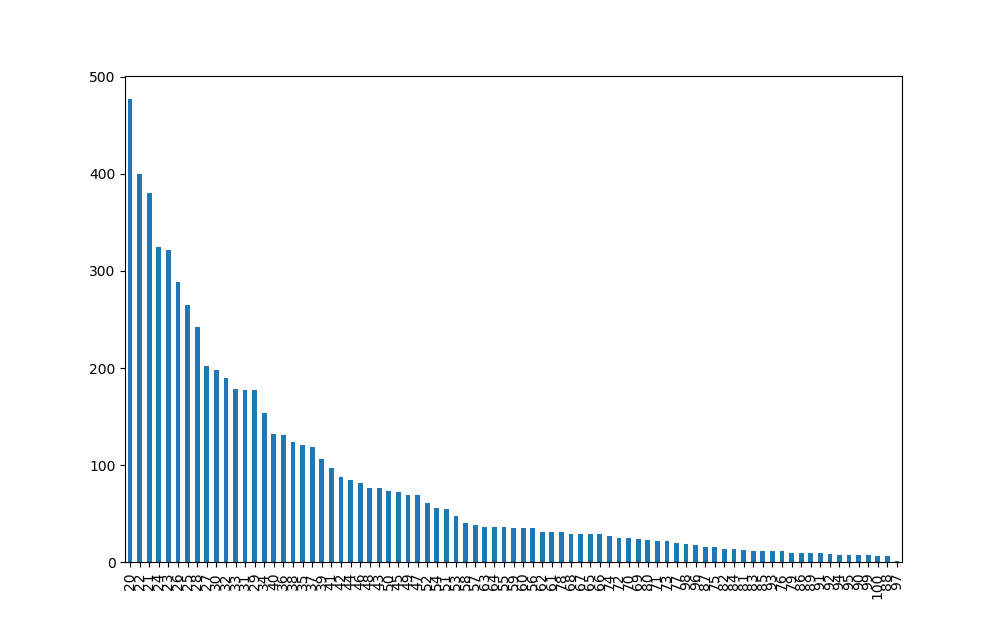

In [45]:
%matplotlib notebook
min_20_max_100_books.plot(kind = "bar")

In [39]:
user_items_df["no_of_books"].value_counts().plot(kind = "bar")

In [45]:
user_min_items_df = user_items_df[user_items_df['no_of_books'] >=20]
user_min_items_df.reset_index(inplace=True)
user_min_items_df.shape

(6867, 2)

In [46]:
user_min_items_df.head()

,learner_id,no_of_books
0,579.0,23
1,842.0,42
2,2295.0,92
3,2425.0,27
4,2870.0,33


In [47]:
user_min_items_df['no_of_books'].sum()

269901

In [39]:
df[df['learner_id'] == 579.0]

,learner_id,book_code,events_count,first_access_time,learner_birthday,learner_gender,dob,age,Unnamed: 0_BM,BOOK_META_CODE,...,VALID_TYPE,VALID_EDTIME,MYTODAY_EXBT_CODE,JSON_DATA,SUB_BOOK_CODE,CRE_DTIME_BI,UPD_DTIME_BI,CRE_ID_BI,UPD_ID_BI,PAY_GROUP_CODE
34673,579.0,BO-20161226152837329,2,2017-09-21 10:43:49,2000-04-25 15:00:00,male,2000-04-25 15:00:00,17.0,19074,BM-20161226152837329,...,NaN,NaN,NaN,NaN,NaN,2016-12-26 15:28:46,2017-05-10 15:24:46,BULK,ME-20140820170723648,PG004
55524,579.0,BO-20140726014638460,1,2017-09-15 07:16:46,2000-04-25 15:00:00,male,2000-04-25 15:00:00,17.0,2220,BM-20140726022029687,...,NaN,NaN,NaN,NaN,NaN,2014-07-26 2:29:55,2015-11-20 11:03:58,BULK,ME-20140820170723648,PG001
57410,579.0,BO-20140726014641482,1,2017-09-14 09:38:42,2000-04-25 15:00:00,male,2000-04-25 15:00:00,17.0,2431,BM-20140726022037963,...,NaN,NaN,NaN,"{""VIEWMODEINFO"":""HD"",""AUDIOBOOKTP"":""C"",""VIEWFU...",NaN,2014-07-26 2:29:55,2017-01-04 10:32:14,BULK,ME-20160527174138665,PG001
57513,579.0,BO-20140726014856420,1,2017-09-25 04:09:25,2000-04-25 15:00:00,male,2000-04-25 15:00:00,17.0,1004,BM-20140726021941057,...,NaN,NaN,NaN,"{""VIEWMODEINFO"":""HD"",""AUDIOBOOKTP"":""C"",""VIEWFU...",NaN,2014-07-26 2:29:56,2016-12-28 10:24:37,BULK,ME-20160527174138665,PG001
57611,579.0,BO-20140726014924121,1,2017-09-14 13:19:35,2000-04-25 15:00:00,male,2000-04-25 15:00:00,17.0,1773,BM-20140726022011619,...,NaN,NaN,NaN,"{""VIEWMODEINFO"":""HD"",""AUDIOBOOKTP"":""C"",""VIEWFU...",NaN,2014-07-26 2:29:56,2017-01-06 16:42:29,BULK,ME-20160527174138665,PG001
58033,579.0,BO-20140726014958361,1,2017-09-21 13:17:57,2000-04-25 15:00:00,male,2000-04-25 15:00:00,17.0,1333,BM-20140726021953839,...,NaN,NaN,NaN,"{""VIEWMODEINFO"":""HD"",""AUDIOBOOKTP"":""C"",""VIEWFU...",NaN,2014-07-26 2:29:56,2017-01-11 13:53:41,BULK,ME-20160527174138665,PG001
59090,579.0,BO-20141030210059461,1,2017-09-14 12:58:47,2000-04-25 15:00:00,male,2000-04-25 15:00:00,17.0,4262,BM-20141030210059461,...,NaN,NaN,NaN,NaN,NaN,2014-10-30 21:04:21,2015-05-18 14:19:08,BULK,ME-20141209171110839,PG001
59131,579.0,BO-20141030210100473,3,2017-09-21 13:19:32,2000-04-25 15:00:00,male,2000-04-25 15:00:00,17.0,4264,BM-20141030210100473,...,NaN,NaN,NaN,NaN,NaN,2014-10-30 21:04:21,2015-02-05 16:58:28,BULK,ME-20141209171110839,PG001
59148,579.0,BO-20141030210104509,1,2017-09-14 13:03:54,2000-04-25 15:00:00,male,2000-04-25 15:00:00,17.0,4272,BM-20141030210104509,...,NaN,NaN,NaN,NaN,NaN,2014-10-30 21:04:21,2015-05-03 22:32:57,BULK,ME-20141209171110839,PG001
59165,579.0,BO-20141030210105519,2,2017-09-21 13:30:47,2000-04-25 15:00:00,male,2000-04-25 15:00:00,17.0,4274,BM-20141030210105519,...,NaN,NaN,NaN,NaN,NaN,2014-10-30 21:04:21,2015-05-03 22:33:22,BULK,ME-20141209171110839,PG001
